# Importation des bibliothèques nécessaires

In [14]:
%matplotlib inline
import numpy as np
from scipy.stats import mode
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

# Chargement du fichier de données

In [15]:
import pandas
data = pandas.read_csv( "train_cap2018.csv")
data.head()


,fulltext,sentences,words,letters.all,syllables,punct,avg.sentc.length,avg.word.length,avg.syll.word,sntc.per.word,...,Maas lgV0,MATTR,MSTTR,MTLD,Root TTR,Summer,TTR.1,Uber index,Yule's K,level1
0,\r\r\n The Eiffel Tower The Eiffel Tower ...,16,233,1116,363,32,14.562500,4.789700,1.557940,0.068670,...,4.96,0.72,0.70,70.74,8.98,0.88,0.59,24.30,146.62,C2
1,\r\r\n The Court Green burglar arrested A...,7,180,866,268,18,25.714286,4.811111,1.488889,0.038889,...,5.07,0.74,0.76,107.12,8.57,0.89,0.64,26.14,141.98,C2
2,\r\r\n Thank you for giving us the opport...,10,180,861,269,20,18.000000,4.783333,1.494444,0.055556,...,5.99,0.77,0.78,161.93,9.62,0.92,0.72,35.15,62.96,C2
3,\r\r\n The international AI conference ca...,10,180,872,281,20,18.000000,4.844444,1.561111,0.055556,...,5.49,0.77,0.81,141.10,9.09,0.90,0.68,30.11,70.99,C2
4,\r\r\n I believe that the creative writin...,11,187,849,283,29,17.000000,4.540107,1.513369,0.058824,...,4.61,0.68,0.64,70.69,7.97,0.87,0.58,22.02,124.11,C2


In [16]:
#purification 
#on remplace tous les nan de la base par des 0.0
data=data.fillna(0)

([<matplotlib.patches.Wedge at 0x7f2580f54b00>,
  <matplotlib.text.Text at 0x7f2580f1bac8>])

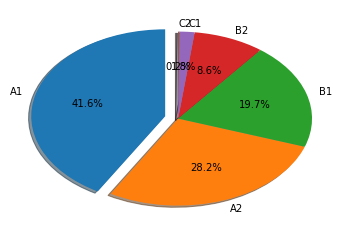

In [19]:
#visualisation
m=np.array(data["level1"]) 
liste=[0,0,0,0,0,0]
for i in range(len(m)):
    if(m[i]=="A1"):
        liste[0]+=1
    if(m[i]=="A2"):
        liste[1]+=1
    if(m[i]=="B1"):
        liste[2]+=1
    if(m[i]=="B2"):
        liste[3]+=1
    if(m[i]=="C1"):
        liste[4]+=1
    if(m[i]=="C2"):
        liste[5]+=1

explode=[0.10,0,0,0,0,0]
origin=["A1","A2","B1","B2","C1","C2"]
plt.pie(liste,explode=explode,labels=origin,autopct='%1.1f%%',shadow=True,startangle=90)


In [21]:
X = data.as_matrix()
y = data[['level1']].as_matrix().squeeze()
n = y.shape
taille=n[0]
for i in range(taille): 
    if(y[i]=="A1") :
        y[i]=1
    if(y[i]=="A2") :
        y[i]=2
    if(y[i]=="B1") :
        y[i]=3
    if(y[i]=="B2") :
        y[i]=4
    if(y[i]=="C1") :
        y[i]=5
    if(y[i]=="C2") :
        y[i]=6
print(y)
y = y.astype(np.float)

[6 6 6 ..., 1 1 1]


On retire la première colonne correspondant au full-text et la dernière colonne correspondant à l'étiquette
Normalisation des données numériques en divisant par l'écart-type

In [22]:
X = np.delete(X, len(X[0])-1, 1) # 1 ==> supprimer la 45ème collone, si ct 2=> supprimer la 45ème ligne
X = np.delete(X, 0, 1)
#X=X.astype(np.float)
print(X)



[[16 233 1116 ..., 0.59 24.3 146.62]
 [7 180 866 ..., 0.64 26.14 141.98]
 [10 180 861 ..., 0.72 35.15 62.96]
 ..., 
 [2 20 63 ..., 0.9 36.99 100.0]
 [5 27 107 ..., 0.85 29.42 137.17]
 [1 38 174 ..., 0.71 16.82 221.61]]


On calcule les plus proches voisins

In [23]:
from sklearn.neighbors import NearestNeighbors,KNeighborsClassifier
np.isnan(X[0].any())#and gets False
np.isnan(y[0].any())
#np.isfinite(X.all()) #and gets True

False

In [24]:
# Créeons un `classifieur` qui calculera les 3 plus proches voisins d'un nouveau points
# en prenant des voisins parmi tous les exemples de X
classifieur = KNeighborsClassifier(n_neighbors=3).fit(X[:10],y[:10])
# Calcul de la prédiction pour les tuples de la matrice
print('prediction pour les cinq premiers exemples de X = ',classifieur.predict(X[:10]))

prediction pour les cinq premiers exemples de X =  [ 6.  6.  6.  6.  6.  6.  6.  6.  6.  6.]


# Fonction qui renvoit l'erreur empirique

In [25]:
def calcul_erreur_empirique(X,y,k) :
    classifieur = KNeighborsClassifier(n_neighbors=k).fit(X,y)
    d = np.sum((classifieur.predict(X)!=y).astype(int))
    print(d)
    return d
calcul_erreur_empirique(X[:10],y[:10],3)


0


0

In [26]:
def calcule_erreur(X_train,y_train,X_test,y_test,k) :
    classifieur = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
    calcul_erreur_empirique(X_test,y_test,k)

# Application de la régression linéaire

In [27]:
import random

def g(z):
    "Numerically stable sigmoid function."
    if z >= 0:
        ez = np.exp(-z)
        return 1 / (1 + ez)
    else:
        # if x is less than zero then z will be small, denom can't be
        # zero because it's 1+z.
        ez = np.exp(z)
        return ez / (1 + ez)




def reg_lineaire(X,y,alpha,lambd):
    def gradient_l1(t,alpha,lambd):
        t2 = t - alpha*lambd*np.sign(t)
        t2[np.sign(t) != np.sign(t2)] = 0
        return t2
    
    n,d = X.shape
    theta = np.zeros(d)

    for t in range(1000):

        i = random.randint(0,n-1)
        xi = X[i]
        yi = y[i]
        h = g(np.dot( theta , xi ))
        #print(theta)
        #theta -= alpha*xi*(h-yi)+alpha*lambd*np.sign(theta)
        theta -= alpha*xi*(h-yi)
        theta = gradient_l1(theta,alpha,lambd)
    return theta
reg_lineaire(X,y,1,1)

TypeError: ufunc 'subtract' output (typecode 'O') could not be coerced to provided output parameter (typecode 'd') according to the casting rule ''same_kind''

# Application de la regression logistique

In [13]:
def reg_lineaire(X,y,alpha,lambd):
    def gradient_l1(t,alpha,lambd):
        t2 = t - alpha*lambd*np.sign(t)
        t2[np.sign(t) != np.sign(t2)] = 0
        return t2
    
    n,d = X.shape
    theta = np.zeros(d)

    for t in range(1000):

        i = random.randint(0,n-1)
        xi = X[i]
        yi = y[i]
        h = g(np.dot( theta , xi ))
        #print(theta)
        #theta -= alpha*xi*(h-yi)+alpha*lambd*np.sign(theta)
        theta -= alpha*xi*(h-yi)
        theta = gradient_l1(theta,alpha,lambd)
    return theta

